In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import time

def fft(x,fs = None,n = None):
    X = np.fft.fftshift(np.fft.fft(x,n))
    N = len(X)
    k = np.arange(N)
    w = 2*np.pi*k/N
    w = np.fft.fftshift(w)
    w = np.unwrap(w - 2*np.pi)
    if fs != None:
        f = w*fs/(2*np.pi)
        return X,f,w
    else:
        return X,w

def tomV_byBitalino(ADC, n = 10, VCC = 3.3):
    volts = (((ADC/(2**n))-(1/2)) * VCC)/1009
    return volts*1000


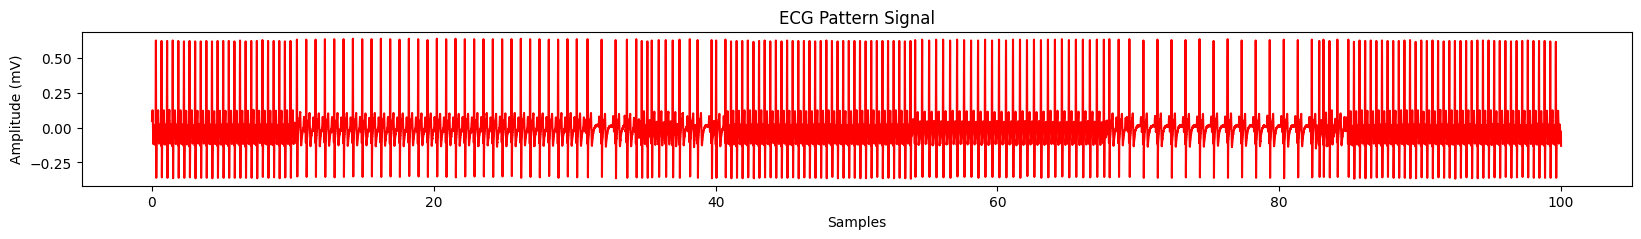

In [28]:
sensor = np.genfromtxt('Patron' + ".txt", delimiter="\t")
sensor = sensor[:,-2][:100000]
sensor = tomV_byBitalino(sensor)
fs = 1000
t = np.arange(len(sensor))/fs
plt.figure(figsize=(20,2))
plt.plot(t, sensor, '-r')
plt.title('ECG Pattern Signal')
plt.ylabel('Amplitude (mV)')
plt.xlabel('Samples')
plt.show()

In [29]:
ecg_signal = sensor

# Configura la ventana deslizante
window_size = 2000  # Tamaño de la ventana en muestras
window = []

for value in ecg_signal:
    # Añade el valor a la ventana
    window.append(value)
    
    # Si la ventana es demasiado grande, quita el valor más antiguo
    if len(window) > window_size:
        window.pop(0)
    
    # Si la ventana está llena, calcula el BPM
    if len(window) == window_size:
        h = np.max(window)*(2/3)
        x, y = find_peaks(window, height=h)
        BPM = 60/(t[x[1]]-t[x[0]])
        if (BPM<=300):
            print('BPM:', BPM)
    
    # Simula un retraso para emular la adquisición de datos en tiempo real
    # time.sleep(0.001)


BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.7537688442211
BPM: 150.75